In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
import scipy


(640, 640, 3)

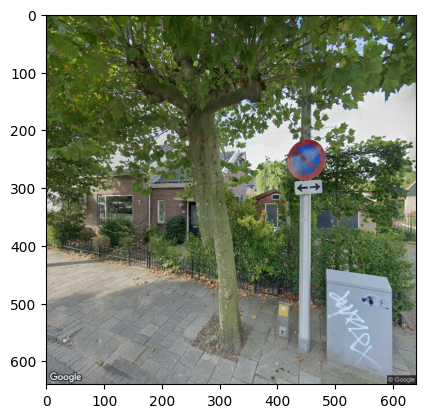

In [2]:
img = image.load_img("is_tree_images/train_images/tree/152_2021-09_52-009821571910685_4-325297593030579_Redelijk.jpg")
plt.imshow(img)
cv2.imread("is_tree_images/train_images/tree/152_2021-09_52-009821571910685_4-325297593030579_Redelijk.jpg").shape

In [3]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

train_dataset = train.flow_from_directory('is_tree_images/train_images', target_size = (200,200), batch_size = 3, class_mode = 'binary')

validate_dataset = validation.flow_from_directory('is_tree_images/validate_images', target_size = (200,200), batch_size = 3, class_mode = 'binary')

Found 210 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [4]:
train_dataset.class_indices

{'not_tree': 0, 'tree': 1}

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics = ['accuracy'])

In [7]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 20,
                      epochs = 30,
                      validation_data = validate_dataset)

Epoch 1/30
20/20 [==============================] - 14s 83ms/step - loss: 2.0986 - accuracy: 0.6333 - val_loss: 0.6513 - val_accuracy: 0.4231
Epoch 2/30
20/20 [==============================] - 1s 28ms/step - loss: 0.7559 - accuracy: 0.7167 - val_loss: 0.6374 - val_accuracy: 0.7308
Epoch 3/30
20/20 [==============================] - 1s 29ms/step - loss: 0.5082 - accuracy: 0.7833 - val_loss: 0.5067 - val_accuracy: 0.8077
Epoch 4/30
20/20 [==============================] - 1s 27ms/step - loss: 0.5819 - accuracy: 0.7500 - val_loss: 0.4545 - val_accuracy: 0.7692
Epoch 5/30
20/20 [==============================] - 1s 27ms/step - loss: 0.3574 - accuracy: 0.8000 - val_loss: 1.5854 - val_accuracy: 0.6538
Epoch 6/30
20/20 [==============================] - 1s 27ms/step - loss: 0.5021 - accuracy: 0.8167 - val_loss: 0.4589 - val_accuracy: 0.8077
Epoch 7/30
20/20 [==============================] - 1s 28ms/step - loss: 0.3974 - accuracy: 0.9333 - val_loss: 0.5385 - val_accuracy: 0.8462
Epoch 8/30
2

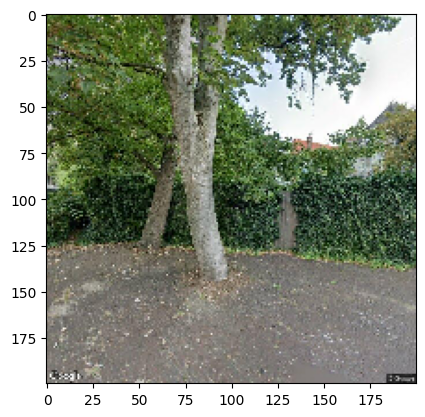

1/1 [==============================] - 0s 169ms/step
a tree


In [8]:
img = image.load_img('is_tree_images/validate_images/tree/13182_2021-09_52-01082266294491_4-355730754059023_Slecht.jpg', target_size=(200,200))
plt.imshow(img)
plt.show()

X = image.img_to_array(img)
X = np.expand_dims(X,axis = 0)
images = np.vstack([X])
val = model.predict(images)
if val == 0:
    print("not a tree")
else:
    print("a tree")

In [9]:
tf.keras.models.save_model(model, 'is_tree_model')

INFO:tensorflow:Assets written to: is_tree_model\assets


INFO:tensorflow:Assets written to: is_tree_model\assets
